In [ ]:
import yfinance as yf
dat = yf.Ticker("MSFT")

In [ ]:
dat = yf.Ticker("MSFT")
dat.info
dat.calendar
dat.analyst_price_targets
dat.quarterly_income_stmt
dat.history(period='1mo') # 1 month of historical data
dat.option_chain(dat.options[0]).calls

In [ ]:
from data_fetch import get_price
start = '2024-01-01'
end = '2025-01-01'
prices = get_price(['AAPL', 'MSFT'], start, end)
prices

In [ ]:
#setting pandas to display floats with 2 decimal places
import pandas as pd

# Set pandas to display floats with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
prices['Close']

In [ ]:
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices

shares = ['AAPL', 'MSFT']

portfolio = Portfolio()
for symbol in shares:
    portfolio.add_asset(symbol, 1)



start = '2024-01-01'
end = '2025-01-01'

prices_df = get_price(shares, start, end)
prices_close_df = prices_df['Close']

print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))
#plot_prices(prices_close_df)

In [ ]:
#1. getting data from yfinance
# Example usage
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices

shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset
portfolio = Portfolio()
for i, symbol in enumerate(shares):
    portfolio.add_asset(symbol, num_shares[i])



prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)
prices_df

In [ ]:
import pandas as pd
#retrieve data from csv
prices_df = pd.read_csv('prices.csv', parse_dates=True)
prices_df

In [ ]:
fil = ['Price', 'Close']
for i,element in enumerate(shares[1:]):
    fil.append('Close'+'.'+str(i+1))
    print(fil)
#filtering the columns to get only the closing prices
prices_close_df = prices_df[fil]
prices_close_df

In [ ]:
column_new = ['Date']
for i,element in enumerate(shares):
    column_new.append(element)
print(column_new)
prices_close_df.columns = column_new
prices_close_df


In [ ]:
#erase rows 0 and 1
prices_close_df = prices_close_df.drop([0, 1])
prices_close_df

In [ ]:
prices_close_df.set_index('Date', inplace=True)
prices_close_df

In [ ]:
#Changing output of dataframe to float
print(portfolio.holdings['AAPL'])
print(type(float(prices_close_df['AAPL']['2024-01-02'])))
print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))


In [ ]:
value = portfolio.get_portfolio_value(prices_close_df)
value

## Visualisations for the platform

In [ ]:
#1. basic visualization of stock prices.
#prices_close_df
prices_close_df = prices_close_df.astype(float) #turn values to float
plot_prices(prices_close_df)

## Making Dates Dynamic 

In [ ]:
import pandas as pd
#retrieve data from csv
prices_pdates = pd.read_csv('prices.csv', parse_dates=True)
prices_pdates = prices_pdates.drop([0, 1])
prices_pdates = prices_pdates.rename(columns={'Price': 'Date'})
prices_pdates

In [ ]:
from datetime import datetime
# prices_pdates.columns
prices_pdates_out = prices_pdates['Date']
prices_pdates_list= prices_pdates_out.tolist()
print(type(prices_pdates_list[0]))
prices_pdates_list_e1 =datetime.strptime(prices_pdates_list[0], '%Y-%m-%d') #Transform the first date to datetime object
prices_pdates_list_e1


In [ ]:
#turn values in Date column to datetime objects (PANDAS METHOD)
prices_pdates['Date_a'] = pd.to_datetime(prices_pdates['Date'])

In [ ]:
# Convert the 'Date' column to datetime objects (PYTHON METHOD)
prices_pdates['Date_ b'] = prices_pdates['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))  # Format to string

In [ ]:
# check the type of the first element in the 'Date' columns
print(type(prices_pdates['Date_a'].to_list()[0]))  # PANDAS METHOD
print(type(prices_pdates['Date_ b'].to_list()[0]))  # PYTHON METHOD

#both work. Need to change the code to use dynamic dates. 

# Backtester 1.0

In [ ]:
# Bring it all together for a 1.0 version. 
def get_closest_date_index(date, df_original):
    """
    Get the index of the closest date in a list of dates.
    Args:
        date (timestamp): The date to find the closest match for.
        date_series (pandas.Series): A pandas series of pandas.Timestamp objects.
    Returns:
        int: The index of the closest date in the list.
    """
    # getting the closest date index
    df_with_dates = df_original.copy()
    df_with_dates['timedeltas'] = abs(df_with_dates.index - date)
    min_diff = min(df_with_dates['timedeltas'])
    # Calculate the difference between the last date in the DataFrame and today
    index = df_with_dates['timedeltas'].isin([min_diff]).idxmax()
    return index
## 1. DATA FETCHING
# Example usage
from data_fetch import get_price
from portfolio import Portfolio
from portfolio import get_closest_date_index
from plotter import plot_df_prices
import pandas as pd
import datetime

shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset
portfolio = Portfolio()
for i, symbol in enumerate(shares):
    portfolio.add_asset(symbol, num_shares[i])

prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)

#retrieve data from csv
prices_df = pd.read_csv('prices.csv')
prices_df

columns_to_filter = ['Price', 'Close']
for i,element in enumerate(shares[1:]):
    columns_to_filter.append('Close'+'.'+str(i+1))
    print(columns_to_filter)

#filtering the columns to get only the closing prices
prices_close_df = prices_df[columns_to_filter]

column_new = ['Date']
for i,element in enumerate(shares):
    column_new.append(element)
print(column_new)
prices_close_df.columns = column_new

#erase rows 0 and 1
prices_close_df = prices_close_df.drop([0, 1])

# Convert 'Date' column to datetime objects
prices_close_df['Date'] = pd.to_datetime(prices_close_df['Date'])
prices_close_df.set_index('Date', inplace=True)
print(prices_close_df)
print(type(prices_close_df.index[-1]))

#Time delat 
date = datetime.datetime.strptime("2025-06-06", '%Y-%m-%d')
date = pd.Timestamp(date)  # Convert to pandas Timestamp
print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df, date))


#1. basic visualization of stock prices.
#prices_close_df
prices_close_df = prices_close_df.astype(float) #turn values to float
plot_df_prices(prices_close_df)

#both work. Need to change the code to use dynamic dates. 

In [ ]:
date = datetime.datetime.strptime("2024-12-28", '%Y-%m-%d')
date = pd.Timestamp(date)  # Convert to pandas Timestamp
i = get_closest_date_index(date, prices_close_df)
i

## Creating different Portfolios to track and backtest

In [ ]:
#portfolio2
shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares_santi = [2, 3, 1, 2, 3, 5, 8] # Number of shares for each asset
num_shares_gus = [5, 5, 5, 1, 1, 5, 1]
portfolio_santi = Portfolio()
portfolio_gus = Portfolio()
for i, symbol in enumerate(shares):
    portfolio_santi.add_asset(symbol, num_shares_santi[i])
    portfolio_gus.add_asset(symbol, num_shares_gus[i])

print("Portfolio Value:", portfolio_santi.get_portfolio_value(prices_close_df, date))
print("Portfolio Value:", portfolio_gus.get_portfolio_value(prices_close_df, date))



## Plotting the portfolio values

In [ ]:
cutoff_date = datetime.datetime.strptime("2009-01-31", '%Y-%m-%d')
cutoff_date = pd.Timestamp(cutoff_date) 
# Create a new DataFrame with the same index as prices_close_df
# Get all rows after and including the cutoff_date
sliced_df = prices_close_df.loc[cutoff_date:]

portfolio_values_df = pd.DataFrame()
portfolio_values_df['Date'] = sliced_df.index
portfolio_values_df['Santi'] = portfolio_values_df['Date'].apply(lambda x: portfolio_santi.get_portfolio_value(prices_close_df, x))  # Format to string
portfolio_values_df['Gus'] = portfolio_values_df['Date'].apply(lambda x: portfolio_gus.get_portfolio_value(prices_close_df, x)) 
portfolio_values_df['Base'] = portfolio_values_df['Date'].apply(lambda x: portfolio.get_portfolio_value(prices_close_df, x)) 
# Display the new DataFrame
portfolio_values_df

In [ ]:
portfolio_values_df.set_index('Date', inplace=True)
# Plot the portfolio values
portfolio_values_df.plot()

In [ ]:
a = list(range(1, 10))
a.append(a[-1])
a

In [ ]:
a[-2] = 100
a

In [ ]:
import pandas as pd
dict = {'2025': {'aa':1, 'bb':2}, '2026': {'aa':3, 'bb':4}}
df = pd.DataFrame(dict)
df.T

## Backtester 1.1

In [ ]:
# Bring it all together for a 1.1 version. 
from data_fetch import get_price
from data_fetch import import_yf_df
from portfolio import Portfolio
from portfolio import get_closest_date_index
from plotter import plot_df_prices_components
import pandas as pd



shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset

#get price data with the API (yahoo finance)
#prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)

#import csv data and clean it
prices_close_df = import_yf_df('prices.csv', shares)


valid_date = get_closest_date_index(pd.Timestamp('2023-12-31'), prices_close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index
stock_price_purchased = dict(prices_close_df.loc[pd.to_datetime(valid_date)])  # Get the stock prices for the valid date
print(stock_price_purchased)
portfolio = Portfolio('Gus', "M", {str(valid_date):{'AAPL': 1, 'MSFT': 1, 'GOOG': 1, 'AMZN': 1, 'TSLA': 1, 'NVDA': 1, 'NFLX': 1}}, stock_price_purchased,str(valid_date))

#test functionality
#removing an asset
valid_date = get_closest_date_index(pd.Timestamp('2025-04-30'), prices_close_df)
symbol = 'AAPL'
portfolio.remove_asset(symbol,1, str(valid_date), prices_close_df)  # Remove 1 share of AAPL at the price on the valid date


#adding a new asset
valid_date = get_closest_date_index(pd.Timestamp('2025-06-01'), prices_close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index
stock_price_purchased = dict(prices_close_df.loc[pd.to_datetime(valid_date)])  # Get the stock prices for the valid date
symbol = 'AAPL'
portfolio.add_asset(symbol, 1,str(valid_date), float(stock_price_purchased[symbol]))  # Add 1 share of AAPL at the price on the valid date

#print(portfolio.holdings)
print(portfolio.investment)
print(portfolio.capital_gains)


# # Calculating portfolio value for each date in the test DataFrame
val = portfolio.get_portfolio_value(prices_close_df)
cols_graph = val.columns[:-1]
val  # Remove the 'Date' column for plotting



In [ ]:
from plotter import plot_df_prices_components
plot_df_prices_components(val[cols_graph])

### Viz comparison

In [ ]:
# Bring it all together for a 1.2 version. 
from data_fetch import get_price
from data_fetch import import_yf_df
from portfolio import Portfolio
from portfolio import get_closest_date_index
from plotter import plot_df_prices_components
from plotter import plot_df_prices_lines
from plotter import plot_df_prices_lines

import pandas as pd



shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset

#get price data with the API (yahoo finance)
#prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)

#import csv data and clean it
prices_close_df = import_yf_df('prices.csv', shares)


valid_date_g = get_closest_date_index(pd.Timestamp('2023-12-31'), prices_close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index
valid_date_s = get_closest_date_index(pd.Timestamp('2021-12-31'), prices_close_df)  # needto handle different dates for different portfolios
valid_date_w = get_closest_date_index(pd.Timestamp('2018-12-31'), prices_close_df)  # idem

stock_price_purchased = dict(prices_close_df.loc[pd.to_datetime(valid_date_g)])
portfolio_g = Portfolio('Gustavo', "M", {str(valid_date_g):{'AAPL': 10, 'MSFT': 10, 'GOOG': 10, 'AMZN': 10, 'TSLA': 10, 'NVDA': 10, 'NFLX': 10}}, stock_price_purchased, str(valid_date_g))
portfolio_s = Portfolio('Santiago', "S", {str(valid_date_s):{'AAPL': 8, 'MSFT': 10, 'GOOG': 12, 'AMZN': 5, 'TSLA': 14, 'NVDA': 4, 'NFLX': 15}}, stock_price_purchased, str(valid_date_s))
portfolio_w = Portfolio('Warren', "B", {str(valid_date_w):{'AAPL': 40, 'MSFT':60}}, stock_price_purchased, str(valid_date_w))

valid_date_g2 = get_closest_date_index(pd.Timestamp('2025-06-01'), prices_close_df)
stock_price_purchased2 = dict(prices_close_df.loc[pd.to_datetime(valid_date_g2)])  # Get the stock prices for the valid date
symbol2 = 'AAPL'
portfolio_g.add_asset(symbol2, 1, str(valid_date_g2), float(stock_price_purchased2[symbol2]))  # Add 1 share of AAPL at the price on the valid date
portfolio_s.add_asset(symbol2, 1, str(valid_date_g2), float(stock_price_purchased2[symbol2]))  # Add 1 share of AAPL at the price on the valid date
portfolio_w.add_asset(symbol2, 1, str(valid_date_g2), float(stock_price_purchased2[symbol2]))  # Add 1 share of AAPL at the price on the valid date

# Calculating portfolio value for each date in the test DataFrame
portfolio_g.get_portfolio_value(prices_close_df)
portfolio_s.get_portfolio_value(prices_close_df)
portfolio_w.get_portfolio_value(prices_close_df)

# Assuming val_g, val_s, and val_w are DataFrames with a "total value" column and the same index
comparison_df = pd.DataFrame({
    'Gus': portfolio_g.portfolio_value['Total_Value'],
    'Santiago': portfolio_s.portfolio_value['Total_Value'],
    'Warren': portfolio_w.portfolio_value['Total_Value']
})
# Display the joined DataFrame
comparison_df

#plot_df_prices_lines(comparison_df)


In [ ]:
inv_df = pd.DataFrame({portfolio_g.full_name: portfolio_g.investment, 
              portfolio_s.full_name: portfolio_s.investment, 
              portfolio_w.full_name: portfolio_w.investment}).T
inv_df

In [ ]:
capgain_df = pd.DataFrame({
              portfolio_g.full_name: portfolio_g.capital_gains, 
              portfolio_s.full_name: portfolio_s.capital_gains, 
              portfolio_w.full_name: portfolio_w.capital_gains}).T
capgain_df

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(portfolio_g.portfolio_value.index, portfolio_g.portfolio_value['Total_Value'], label=portfolio_g.full_name)
plt.plot(portfolio_s.portfolio_value.index, portfolio_s.portfolio_value['Total_Value'], label=portfolio_s.full_name)
plt.plot(portfolio_w.portfolio_value.index, portfolio_w.portfolio_value['Total_Value'], label=portfolio_w.full_name)
plt.legend()
plt.title("Portfolio Values (from inception)")
plt.show()

In [ ]:

plot_df_prices_lines([portfolio_g, portfolio_s, portfolio_w])

### API data

In [ ]:
##FMP API
# PUBLIC API KEY = ?apikey=eGw4yVV5QZwCAsvqO3zZcs8dNRulA1Nk
import requests
# Define the API endpoint and parameters
url = "https://financialmodelingprep.com/stable/senate-latest"
params = {
    'apikey': 'eGw4yVV5QZwCAsvqO3zZcs8dNRulA1Nk'  
}
response = requests.get(url, params=params)
# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    print(data)  # Print the data or process it as needed


In [ ]:
import pandas as pd
# Convert the JSON data to a DataFrame
df = pd.DataFrame(data)
# Display the DataFrame
#df.to_csv('data/senate_data.csv', index=False)  # Save to CSV file
df.info()  # Display the first few rows of the DataFrame

In [13]:
df['symbol'].unique()  # Get unique symbols from the DataFrame
symbol_list = list(df['symbol'].unique())
print(symbol_list)  # Print the unique symbols
print(len(symbol_list))  
# prices_df = get_price(symbol_list)
# prices_df.to_csv('data/senate_prices.csv', index=True)  # Save to CSV file

KeyError: 'symbol'

In [ ]:
df[df['lastName'] == 'Moran']

In [ ]:
#print(df.amount)
for amount in df.amount: 
    amount = amount.split()
    amount.remove('-')
    #print(amount)
    #print(amount[0][1:])
    #print(amount[0][1:].replace(',', '.'))
    #print(float(amount[0][1:].replace(',', '.')))
    no_1 = float(amount[0][1:].replace(',', ''))
    no_2 = float(amount[1][1:].replace(',', '')) 
    print(no_1, no_2)

In [ ]:
#df[df["assetType"]=='ETF'] # Check unique asset types 
df.info

In [ ]:
#get all symbols for senator purchases
symbols_senator = df['symbol'].unique()
print(type(symbols_senator)) # Display the unique symbols


In [ ]:
#getting a list of senators for the analysis since 2020
import pandas as pd
import requests
import json
#load json data from link
url = "https://unitedstates.github.io/congress-legislators/legislators-current.json"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    senator_data_df = pd.DataFrame(data)  # Convert the JSON data to a DataFrame

#need to filter data to include senators for whom we have data (2020 onwards)
#start senators_json
senators_dict={}
for senator in data:
    if senator['terms'] is not None:
        for term in senator['terms']:
            if term['type'] == 'sen' and term['end'] >= '2020-06-01':
                #senators_dict[senator['id']['bioguide']] = senator #modify to include transactions by data
                senators_dict[senator['name']['official_full']] = senator #modify to include transactions by data

print('No. of senators: ', len(senators_dict))

#create a set of senator names
senators_set = {}
for senator in senators_dict.values():
    senators_set [f'{senator['name']['official_full'][0]} {senator['name']['official_full'].split(' ')[-1]}'] = senator['name']['official_full']  # Add first and last name as a list

print(senators_set.keys())
print('J Banks' in senators_set.keys())  # Check if 'J Morran' is in the set
print(senators_set)  # Check if 'J Banks' is in the set



In [ ]:
#create new dict with empty transactions
senators_transactions = {} 
for senator in senators_set.keys():
    senators_transactions[senators_set[senator]] = {}  # Initialize an empty dictionary for each senator

print(senators_transactions)
 # Create a copy of the senators_dict to store transactions
for transaction in df.iterrows():  
    #print(transaction[1].office)
    fullname = transaction[1].office
    simplified_name = f'{fullname[0]} {fullname.split(' ')[-1]}'
    #print(simplified_name)
    if simplified_name in senators_set.keys():
        #print(senators_transactions[senators_set[simplified_name]])
        if transaction[1].transactionDate not in senators_transactions[senators_set[simplified_name]]:
            senators_transactions[senators_set[simplified_name]][transaction[1].transactionDate]= []
        
        senators_transactions[senators_set[simplified_name]][transaction[1].transactionDate].append({'range':transaction[1].amount,
                                                                                                     'symbol':transaction[1].symbol,
                                                                                                     'type':transaction[1].type,
                                                                                                     'owner':transaction[1].owner,
                                                                                                     'assettype':transaction[1].assetType})
                                                                                                    
        # print(simplified_name, 'not found in the set')

print(senators_transactions)   

In [ ]:
senators_transactions[senators_set['J Moran']]#this data is not labelled

In [ ]:
for senator, transactions in senators_transactions.items():
    if bool (transactions) == True:
        for keys_values in transactions.items():
            for transaction in keys_values[1]:
                x = transaction['range'].split()
                x.remove('-')
                range_lower= (float(x[0][1:].replace(',', '')))
                range_higher = (float(x[1][1:].replace(',', '')))
                range_avg = (range_lower + range_higher) / 2
                transaction['range_lower'] = range_lower
                transaction['range_higher'] = range_higher
                transaction['range_avg'] = range_avg
                print(transaction)
  
# bring it all together for portfolio creation


In [ ]:
# # portfolio = Portfolio(names, str(valid_date):'symbol', stock_price_purchased,str(valid_date))
# from portfolio import Portfolio
# import pandas as pd 
# valid_date = get_closest_date_index(pd.Timestamp(31-12-2024), close_df)
# stock_price_purchased = dict(close_df.loc[pd.to_datetime(valid_date)])
# portfolio_santi = Portfolio('santiago','se',{str(valid_date):{'GOOG':1}}, stock_price_purchased,str(valid_date))
# print(portfolio_santi)
# bool(portfolio_santi)

In [ ]:
from portfolio import get_closest_date_index
from data_fetch import import_yf_df
from portfolio import Portfolio
close_df = import_yf_df('data/senate_prices.csv', symbol_list)
close_df.index[0]
# print(close_df.index[0])
senator_portfolio = {}

for names in senators_transactions.keys():
    senator_portfolio[names] = {}

for values in senators_transactions.values():
    if bool (values) == True:
        # portfolio = Portfolio(names, str(valid_date):'symbol', stock_price_purchased,str(valid_date))
        # portfolio = Portfolio('Gus', "M", {str(valid_date):{'AAPL': 1, 'MSFT': 1, 'GOOG': 1, 'AMZN': 1, 'TSLA': 1, 'NVDA': 1, 'NFLX': 1}}, stock_price_purchased,str(valid_date))
        for k ,t in values.items():
            i_transaction = t[0]
            # print(i_transaction['symbol'])
            

for name_l, reported_transactions in senators_transactions.items():
    name_list = name_l.split()
    first_name = name_list[0]
    last_name = name_list[-1]
    
    if bool (reported_transactions) == True:
        for transaction_dates, s in reported_transactions.items():
            for s_transaction in s:
                valid_date = get_closest_date_index(pd.Timestamp(transaction_dates), close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index     
                
                if valid_date is None or pd.isna(valid_date):
                    #print(f"Skipping transaction on {transaction_dates} for {name_l} (no valid date found)")
                    pass
                #creatiing variables to input in portfolio
                symb = s_transaction['symbol']
                units = int(s_transaction['range_avg']/close_df.loc[pd.Timestamp(valid_date)][s_transaction['symbol']])
                stk_price = close_df.loc[pd.Timestamp(valid_date)]

                #print(f"Transaction {transaction_dates} for {name_l} with valid date: {valid_date}, type: {s_transaction['type']}, symbol: {symb}, price: {stk_price[symb]}, units: {units}")
                if bool (senator_portfolio[name_l]) == False:
                    senator_portfolio[name_l] = Portfolio(first_name,
                                                            last_name,
                                                            {str(valid_date):{symb:units}},
                                                            stk_price,
                                                            str(valid_date))# Initialize a new Portfolio object for the senator
        
                else:
                    #print(f"Processing transactions for {name_l}, {senator_portfolio[name_l].holdings}, {s_transaction['type']}, {s_transaction['range']}, symbol: {symb}")
                    if s_transaction['type'][0].lower() == 'p':
                        senator_portfolio[name_l].add_asset(symb, units, str(valid_date), float(stk_price[symb]))
                        #  def add_asset(self, symbol, units, buy_date, buy_price):
                    elif s_transaction['type'][0].lower() == 's':     
                        senator_portfolio[name_l].remove_asset(symb, units, str(valid_date), float(stk_price[symb]))  # Assuming remove_asset is defined in Portfolio
                        # remove_asset(self, symbol, units, sell_date, historical_prices_df):
                        #print(f"Removing {units} shares of {symb} for {name_l} on {valid_date}")
                    else:
                        #print(f"Unknown transaction type: {s_transaction['type']} in {name_l} on {valid_date}")
                        pass
                    #print(f"PROCESSED {name_l}, {senator_portfolio[name_l].holdings}")

print(senator_portfolio['Jerry Moran'].holdings)

In [ ]:
senator_portfolio['John Boozman'].holdings

#### Plotting

In [ ]:
# Clean holdings: keep only the first element for each symbol
cleaned_holdings = {
    date: {symbol: max(0, value[0]) if isinstance(value, list) and len(value) > 0 else value
           for symbol, value in symbols.items()}
    for date, symbols in senator_portfolio['John Boozman'].holdings.items()
}

holdings_df = pd.DataFrame(cleaned_holdings).T
holdings_df

In [ ]:
holdings_df = pd.DataFrame(senator_portfolio['John Boozman'].holdings).T
holdings_df

In [ ]:
senator_portfolio['John Boozman'].get_portfolio_value(close_df)
senator_portfolio['John Boozman'].portfolio_value


In [ ]:
from plotter import plot_df_prices_lines
plot_df_prices_lines([senator_portfolio['John Boozman']])


In [ ]:
from plotter import plot_df_prices_components
plot_df_prices_components(senator_portfolio['John Boozman'])

## Backtester 1.2

/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/data_fetch.py:12: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  prices_df = pd.read_csv(pa

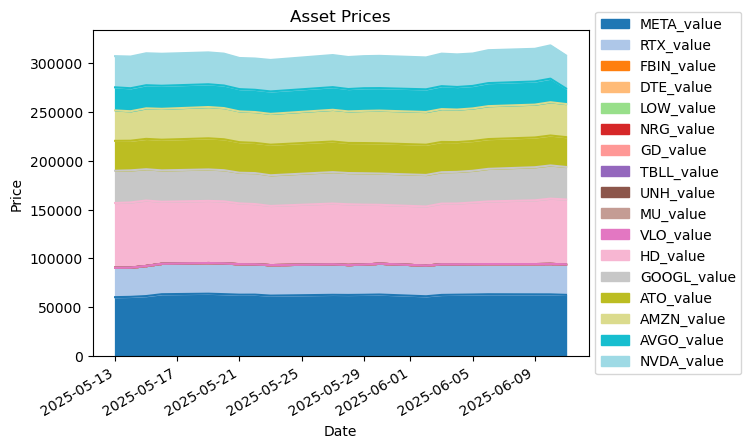

In [1]:
import requests
import pandas as pd
import json
from portfolio import get_closest_date_index
from data_fetch import import_yf_df
from portfolio import Portfolio
from plotter import plot_df_prices_components

##FMP API
# PUBLIC API KEY = ?apikey=eGw4yVV5QZwCAsvqO3zZcs8dNRulA1Nk
# Define the API endpoint and parameters
url = "https://financialmodelingprep.com/stable/senate-latest" #Api Url  
params = {
    'apikey': 'eGw4yVV5QZwCAsvqO3zZcs8dNRulA1Nk'  
}

response = requests.get(url, params=params)
# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the JSON response


response = requests.get(url, params=params)
# Check if the request was successful
   #getting a list of senators for the analysis since 2020

df = pd.DataFrame(data)

df['symbol'].unique()  # Get unique symbols from the DataFrame
symbol_list = list(df['symbol'].unique())



#load json data from link
url = "https://unitedstates.github.io/congress-legislators/legislators-current.json"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    senator_data_df = pd.DataFrame(data)  # Convert the JSON data to a DataFrame

# senator_data_df['symbol'].unique()  # Get unique symbols from the DataFrame
# symbol_list = list(df['symbol'].unique())

#need to filter data to include senators for whom we have data (2020 onwards)
#start senators_json
senators_dict={}
for senator in data:
    if senator['terms'] is not None:
        for term in senator['terms']:
            if term['type'] == 'sen' and term['end'] >= '2020-06-01':
                senators_dict[senator['id']['bioguide']] = senator #modify to include transactions by data
                senators_dict[senator['name']['official_full']] = senator #modify to include transactions by data

#create a set of senator names
senators_set = {}
for senator in senators_dict.values():
    senators_set [f'{senator['name']['official_full'][0]} {senator['name']['official_full'].split(' ')[-1]}'] = senator['name']['official_full']  # Add first and last name as a list

#create new dict with empty transactions
senators_transactions = {} 
for senator in senators_set.keys():
    senators_transactions[senators_set[senator]] = {}  # Initialize an empty dictionary for each senator

 # Create a copy of the senators_dict to store transactions
for transaction in df.iterrows():  
    fullname = transaction[1].office
    simplified_name = f'{fullname[0]} {fullname.split(' ')[-1]}'
    if simplified_name in senators_set.keys():
        if transaction[1].transactionDate not in senators_transactions[senators_set[simplified_name]]:
            senators_transactions[senators_set[simplified_name]][transaction[1].transactionDate]= []

        #creating dict for sentators name and transactions 
        senators_transactions[senators_set[simplified_name]][transaction[1].transactionDate].append({'range':transaction[1].amount,
                                                                                                     'symbol':transaction[1].symbol,
                                                                                                     'type':transaction[1].type,
                                                                                                     'owner':transaction[1].owner,
                                                                                                     'assettype':transaction[1].assetType})

for senator, transactions in senators_transactions.items():
    #calcaution Average of senators invement 
    if bool (transactions) == True:
        for keys_values in transactions.items():
            for transaction in keys_values[1]:
                x = transaction['range'].split()
                x.remove('-')
                range_lower= (float(x[0][1:].replace(',', '')))
                range_higher = (float(x[1][1:].replace(',', '')))
                range_avg = (range_lower + range_higher) / 2
                transaction['range_lower'] = range_lower #lowest amount of invemnet from the range
                transaction['range_higher'] = range_higher #highest amount of invemnet from the range
                transaction['range_avg'] = range_avg #avergae amount of invemnet from the range 

close_df = import_yf_df('data/senate_prices.csv', symbol_list) #importing stock prices and list of the symbols
close_df.index[0]
senator_portfolio = {} #empty dic of senator portfolio 

for names in senators_transactions.keys():
    senator_portfolio[names] = {} # =empty dict of sentator names 

for name_l, reported_transactions in senators_transactions.items():
    #creating list of first name and last name 
    name_list = name_l.split()
    first_name = name_list[0]
    last_name = name_list[-1]
    
    if bool (reported_transactions) == True:
        for transaction_dates, s in reported_transactions.items():# the keys and value of transections 
            for s_transaction in s:
                valid_date = get_closest_date_index(pd.Timestamp(transaction_dates), close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index     
                if valid_date is None or pd.isna(valid_date):
                    pass
                #creating variables to input in portfolio
                symb = s_transaction['symbol']
                units = int(s_transaction['range_avg']/close_df.loc[pd.Timestamp(valid_date)][s_transaction['symbol']])
                stk_price = close_df.loc[pd.Timestamp(valid_date)]

               #checking if porfolio is emtpy 
                if bool (senator_portfolio[name_l]) == False:
                    #creating new portfolio of senator in sentor porfolio
                    senator_portfolio[name_l] = Portfolio(first_name,
                                                            last_name,
                                                            {str(valid_date):{symb:units}},
                                                            stk_price,
                                                            str(valid_date))# Initialize a new Portfolio object for the senator
                else:
                    if s_transaction['type'][0].lower() == 'p':
                        senator_portfolio[name_l].add_asset(symb, units, str(valid_date), float(stk_price[symb]))
                        #  def add_asset(self, symbol, units, buy_date, buy_price):
                    elif s_transaction['type'][0].lower() == 's':     
                        senator_portfolio[name_l].remove_asset(symb, units, str(valid_date), float(stk_price[symb]))  # Assuming remove_asset is defined in Portfolio
                    else:
                        pass

# Clean holdings: keep only the first element for each symbol
cleaned_holdings = {
    date: {symbol: max(0, value[0]) if isinstance(value, list) and len(value) > 0 else value
           for symbol, value in symbols.items()}
    for date, symbols in senator_portfolio['John Boozman'].holdings.items()
}

holdings_df = pd.DataFrame(cleaned_holdings).T
holdings_df

senator_portfolio['John Boozman'].get_portfolio_value(close_df)
plot_df_prices_components(senator_portfolio['John Boozman']) #plotiong graph of senator 


In [2]:
senator_portfolio

{'Maria Cantwell': {},
 'Amy Klobuchar': {},
 'Bernard Sanders': {},
 'Sheldon Whitehouse': {},
 'John Barrasso': {},
 'Roger F. Wicker': {},
 'Susan M. Collins': {},
 'John Cornyn': {},
 'Richard J. Durbin': {},
 'Lindsey Graham': {},
 'Mitch McConnell': <portfolio.Portfolio at 0x14279b380>,
 'Jeff Merkley': {},
 'Jack Reed': {},
 'James E. Risch': {},
 'Jeanne Shaheen': {},
 'Mark R. Warner': {},
 'Kirsten E. Gillibrand': {},
 'Christopher A. Coons': {},
 'Tammy Baldwin': {},
 'Michael F. Bennet': {},
 'Marsha Blackburn': {},
 'Richard Blumenthal': <portfolio.Portfolio at 0x14294d1d0>,
 'John Boozman': <portfolio.Portfolio at 0x14294e490>,
 'Shelley Moore Capito': <portfolio.Portfolio at 0x142912c40>,
 'Bill Cassidy': {},
 'Mike Crapo': {},
 'Chuck Grassley': {},
 'Martin Heinrich': {},
 'Mazie K. Hirono': {},
 'John Hoeven': {},
 'Ron Johnson': {},
 'James Lankford': {},
 'Mike Lee': {},
 'Ben Ray Luján': {},
 'Edward J. Markey': {},
 'Jerry Moran': <portfolio.Portfolio at 0x142912d

/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:191: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # Forward fill to copy portfolio values to all dates until manually changed
/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['yield'] = final['Total_Value'].pct_change()
/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:191: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future vers

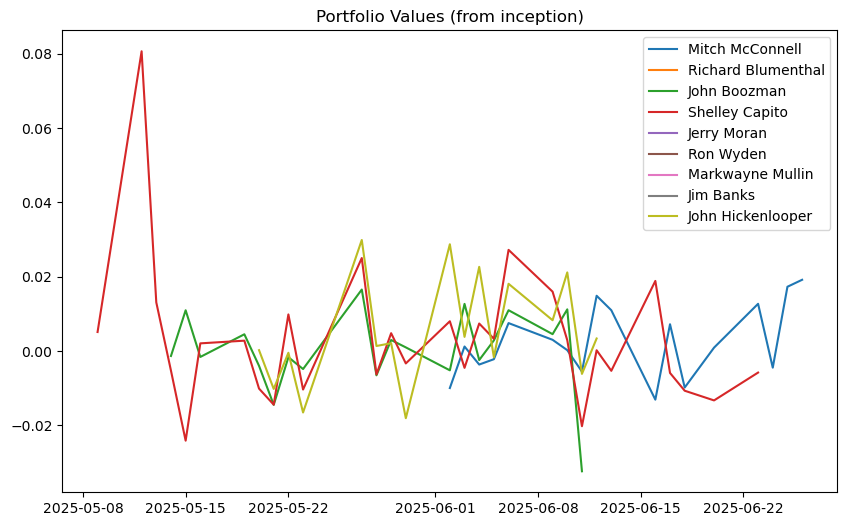

In [3]:
from plotter import plot_df_prices_lines
senator_port_list = []
for portfolios in senator_portfolio.values(): 
    if bool(portfolios):
        portfolios.get_portfolio_value(close_df) 
        senator_port_list.append(portfolios)

plot_df_prices_lines(senator_port_list)  # Plotting all senator portfolios